In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [2]:
df0 = pd.read_csv("LoL_data.csv")

עושים df.info על מנת לראות את ה Dtype של כל הנתונים אם צריך לשנות משהו, מכיוון שאי אפשר לעשות חישובים עם נתון שהוא לא מספרי, למשל: אם יש string צריך לשנות אותו למספר בגלל שהמחשב לא יכול ללמוד ולעשות חישובים עם זה.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

בודקים אם יש נתונים חסרים באמצעות הפקודה isnull ועושים sum בשביל לראות את סך כל הנתונים שהם null. 
אין חסרים כלל

In [4]:
df0.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [5]:
#הצגת 5 שורות ראשונות של הנתונים
df0.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


עושים describe על מנת לראות נתונים סטטיסטיים על הנתונים

In [6]:
df0.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


משתמשים heatmap על מנת לחפש קשר בין משתנים

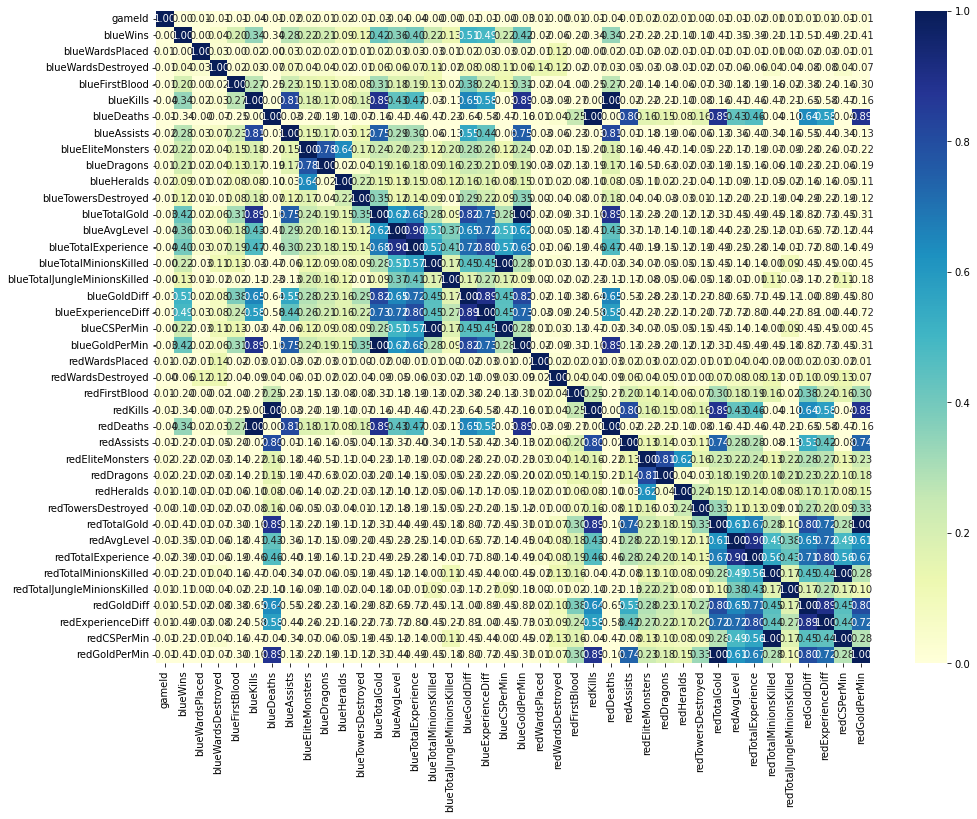

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df0.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

מורידים את gameId כי הוא לא חלק מהנתונים הנחוצים.
מורידים 1 מכל זוג נתונים שהיחס בheatmap שלהם הוא 1:1 כמו "blueDeaths" ו "redKills" אין צורך בשניהם כי הם אומרים בעצם את אותו הדבר רק עם שם, אחר אם קבוצה אחת הורגת 1 בקבוצה השניה מת 1, זה מעלה את המספר בשני העמודות "blueDeaths" ו "redKills" ב1 ולכן אין צורך בשני עמודות כאלו.
ועוד עמודות לא נחוצות.

In [8]:
cols = ['gameId', 'redKills', 'redDeaths', 'blueGoldPerMin', 'redGoldPerMin', 'blueCSPerMin', 'redCSPerMin']
df = df0.drop(cols, axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

heatmap אחרי הורדת נתונים לא נחוצים

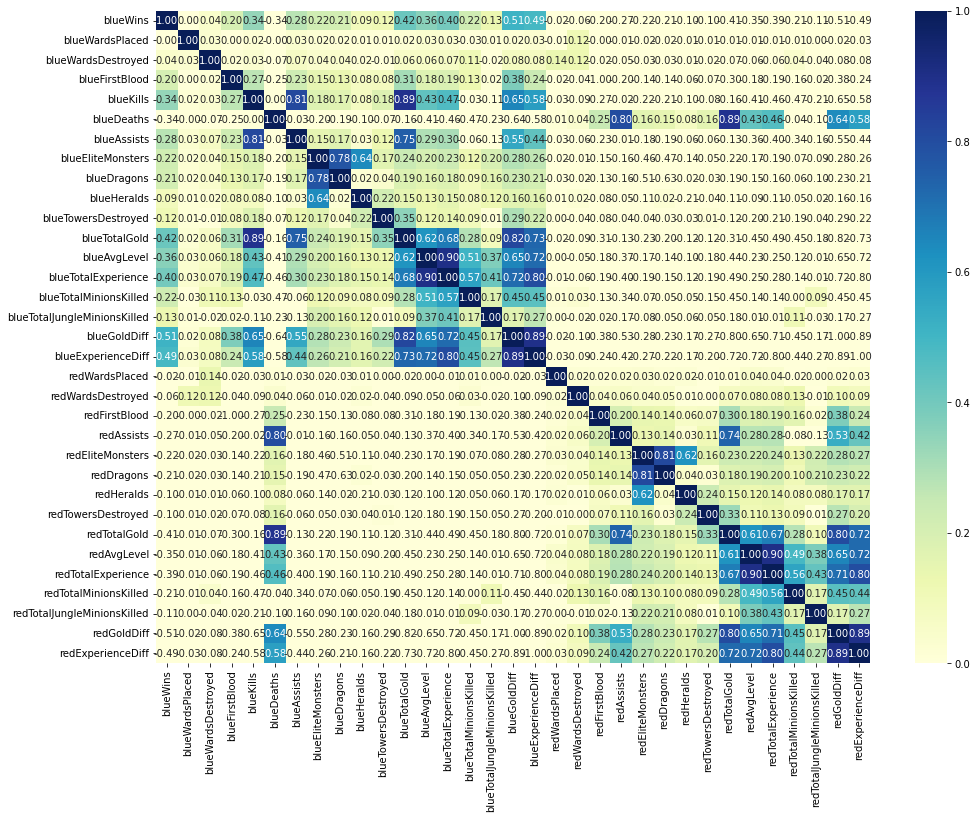

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

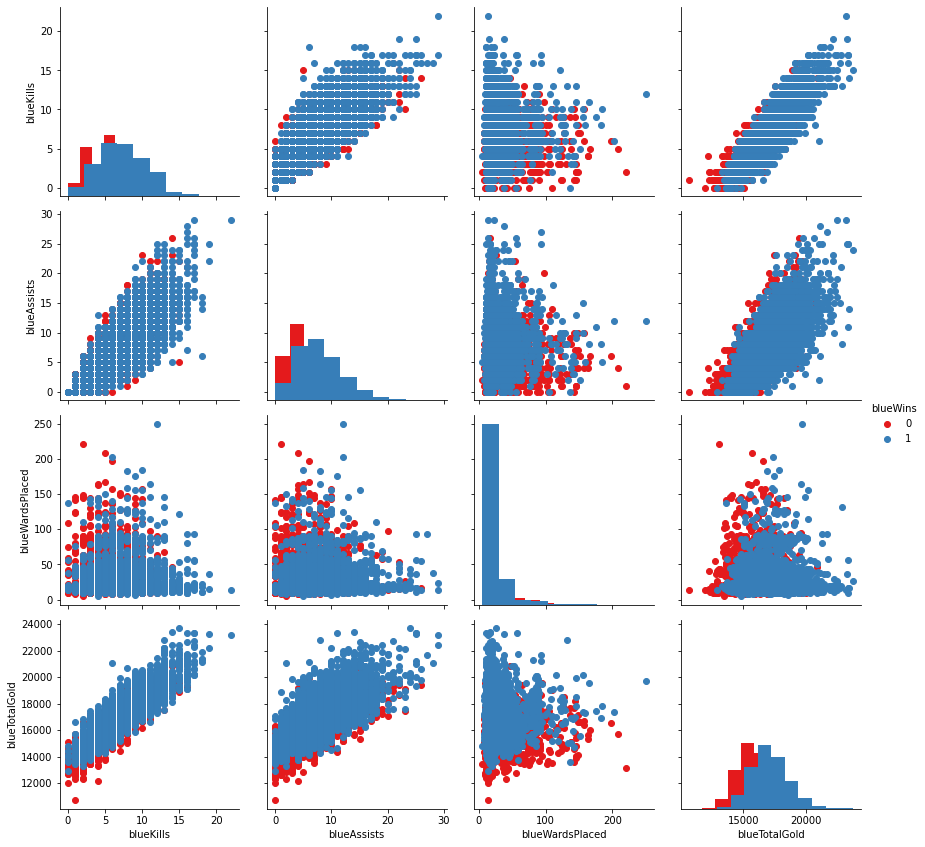

In [11]:
g = sns.PairGrid(data=df, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [12]:
df.info()
dfCols = df.columns
dfCols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')

אפשר לראות שיש הרבה חריגים בwardsplaced 

'blueWardsPlaced',  'blueTotalGold', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redTowersDestroyed',
       'redTotalGold', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'

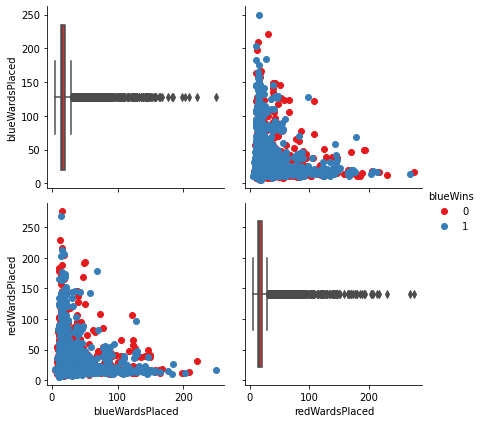

In [13]:

g = sns.PairGrid(data=df, vars=['blueWardsPlaced', 'redWardsPlaced'], hue='blueWins', height=3, palette='Set1')
g.map_diag(sns.boxplot)
g.map_offdiag(plt.scatter)
g.add_legend();

In [14]:
dfTest = df

הורדתי את החריגים מ'blueWardsPlaced' ו'redWardsPlaced' בעזרת הפעולה drop והורדתי את כל מה שערך שלו גדול מ3 סטיות תקן מהממוצע(לא השתמשתי בזה בסוף)

In [15]:
blueWardsMean = df['blueWardsPlaced'].mean()
blueWardsSTD = df['blueWardsPlaced'].std()
redWardsMean = df['redWardsPlaced'].mean()
redWardsSTD = df['redWardsPlaced'].std()
dfTest.drop(dfTest[dfTest.blueWardsPlaced > (blueWardsMean+blueWardsSTD*3)].index, inplace=True)
dfTest.drop(dfTest[dfTest.redWardsPlaced > (redWardsMean+redWardsSTD*3)].index, inplace=True)
print(blueWardsMean)
print(blueWardsSTD)

22.28828828828829
18.019176515802513


In [16]:
print(df.info())
print(dfTest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9878
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9357 non-null   int64  
 1   blueWardsPlaced               9357 non-null   int64  
 2   blueWardsDestroyed            9357 non-null   int64  
 3   blueFirstBlood                9357 non-null   int64  
 4   blueKills                     9357 non-null   int64  
 5   blueDeaths                    9357 non-null   int64  
 6   blueAssists                   9357 non-null   int64  
 7   blueEliteMonsters             9357 non-null   int64  
 8   blueDragons                   9357 non-null   int64  
 9   blueHeralds                   9357 non-null   int64  
 10  blueTowersDestroyed           9357 non-null   int64  
 11  blueTotalGold                 9357 non-null   int64  
 12  blueAvgLevel                  9357 non-null   float64
 13  blu

מחלק את הנתונים לX וy

In [31]:
X = dfTest.drop('blueWins', axis=1).values
y = dfTest['blueWins'].values
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(9357, 32)
(9357, 1)


משתמש בMinMaxScaler בשביל להעביר את כל הערכים למספרים בין 0 ל1.

In [35]:
#MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = scaler.transform(X)

מחלק את הנתונים לtrain וtest כאשר 33 אחוז זה test ו77 אחוז train.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

יוצר מודל של 3 שכבות שפונקציית הactivation היא relu והפונקציה בשכבת הoutput היא sigmoid(מספר בין 0ל1) 

In [20]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer='he_normal', activation='relu'))
model.add(Dense(7, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

מאמן את המודל עם 150 חזרות על כל הנתונים, מחלק את הנתונים לקבוצות של 250 

In [22]:
model.fit(X_train, y_train, epochs=150, batch_size=250, verbose=0)
print("Done")

Done


In [23]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

97/97 [==============================] - 0s 540us/step - loss: 0.5463 - binary_accuracy: 0.7251
[0.5463114380836487, 0.725064754486084]


יוצר את אותו מודל רק הפעם משנה את הloss function 

In [74]:
model2 = Sequential()
model2.add(Dense(200, input_shape=(X_train.shape[1],), activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [75]:
model2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [76]:
model2.fit(X_train, y_train, epochs=300, batch_size=150, verbose=1)
print("Done")

Epoch 1/300
42/42 [==============================] - 0s 1ms/step - loss: 0.2057 - binary_accuracy: 0.6827
Epoch 2/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1788 - binary_accuracy: 0.7279
Epoch 3/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1785 - binary_accuracy: 0.7282
Epoch 4/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1791 - binary_accuracy: 0.7266
Epoch 5/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1771 - binary_accuracy: 0.7330
Epoch 6/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1762 - binary_accuracy: 0.7312
Epoch 7/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1776 - binary_accuracy: 0.7330
Epoch 8/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1774 - binary_accuracy: 0.7314
Epoch 9/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1775 - binary_accuracy: 0.7315
Epoch 10/300
42/42 [==========================

42/42 [==============================] - 0s 2ms/step - loss: 0.1516 - binary_accuracy: 0.7783
Epoch 78/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1537 - binary_accuracy: 0.7778
Epoch 79/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1502 - binary_accuracy: 0.7839
Epoch 80/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1516 - binary_accuracy: 0.7808
Epoch 81/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1493 - binary_accuracy: 0.7842
Epoch 82/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1483 - binary_accuracy: 0.7877
Epoch 83/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1501 - binary_accuracy: 0.7831
Epoch 84/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1482 - binary_accuracy: 0.7834
Epoch 85/300
42/42 [==============================] - 0s 1ms/step - loss: 0.1464 - binary_accuracy: 0.7899
Epoch 86/300
42/42 [==============================

42/42 [==============================] - 0s 1ms/step - loss: 0.0927 - binary_accuracy: 0.8818
Epoch 154/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0900 - binary_accuracy: 0.8872
Epoch 155/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0891 - binary_accuracy: 0.8879
Epoch 156/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0872 - binary_accuracy: 0.8917
Epoch 157/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0871 - binary_accuracy: 0.8906
Epoch 158/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0920 - binary_accuracy: 0.8805
Epoch 159/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0883 - binary_accuracy: 0.8888
Epoch 160/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0853 - binary_accuracy: 0.8934
Epoch 161/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0844 - binary_accuracy: 0.8939
Epoch 162/300
42/42 [=====================

Epoch 229/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0457 - binary_accuracy: 0.9520
Epoch 230/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0496 - binary_accuracy: 0.9448
Epoch 231/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0567 - binary_accuracy: 0.9305
Epoch 232/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0507 - binary_accuracy: 0.9411
Epoch 233/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0458 - binary_accuracy: 0.9502
Epoch 234/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0423 - binary_accuracy: 0.9552
Epoch 235/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0446 - binary_accuracy: 0.9521
Epoch 236/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0413 - binary_accuracy: 0.9574
Epoch 237/300
42/42 [==============================] - 0s 1ms/step - loss: 0.0411 - binary_accuracy: 0.9571
Epoch 238/300
42/42 [=======

In [73]:
accuracy = model2.evaluate(X_test, y_test)
print(accuracy)

97/97 [==============================] - 0s 613us/step - loss: 0.2155 - binary_accuracy: 0.6807
[0.21553929150104523, 0.6806994676589966]


הגעתי לדיוק של 72 אחוז בשני המודלים, במקרה הזה הloss function לא כל כך משנה.

In [64]:
y_pred = model2.predict(X_test)

In [65]:
r2_score(y_test, y_pred)

0.2696660147853168

In [59]:
lmao = model2.predict(X_test[1:20])